In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2, os
import tensorflow as tf

import PIL.Image

In [ ]:
! mkdir -p /root/.kaggle/
! mv kaggle.json /root/.kaggle/

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dog-breed-identification

100% 690M/691M [00:37<00:00, 21.0MB/s]
100% 691M/691M [00:37<00:00, 19.5MB/s]


In [ ]:
!unzip -q dog-breed-identification.zip

In [ ]:
!rm -rvf test sample_submission.csv dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
removed 'test/82e64f28df4fff22beb11e9a1e413212.jpg'
removed 'test/82ec6bdf968a14923340179515ce5546.jpg'
removed 'test/82ee3ee4dc01b33203a049c6c3338034.jpg'
removed 'test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg'
removed 'test/82f5fb0bdaff30a4a3374e2d9915856c.jpg'
removed 'test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg'
removed 'test/8301c772feb7f4068473f0157ae58f9b.jpg'
removed 'test/8307be57a9d76c1584e16801a39cb1dc.jpg'
removed 'test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg'
removed 'test/831ef824af939f9754e3593638933b64.jpg'
removed 'test/8322f53b29325419ef3bcf7cf10d7172.jpg'
removed 'test/83233e2774e116ef34a04c53dd00a282.jpg'
removed 'test/832cae23410e741ecd2014b3818ed7c4.jpg'
removed 'test/833f90a3652b06607b55bd25c8d97457.jpg'
removed 'test/8341f50a86c819b3cb8828740a97e7ef.jpg'
removed 'test/834bb31410410852082813d2e07c3290.jpg'
removed 'test/834f6aaff5dd8f7159bc3c9afeaaead7.jpg'
removed 'test/8356f99f79e539a97028b1e4af918c43.jpg'
removed 'test

In [ ]:
df = pd.read_csv('labels.csv')
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
df['id'] = df['id']+'.jpg'
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0.jpg,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f.jpg,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f.jpg,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac.jpg,miniature_pinscher


In [ ]:
a=[]
for i in df['id']:
   a.append(cv2.imread(f'train/{i}').shape)
a = np.array(a)

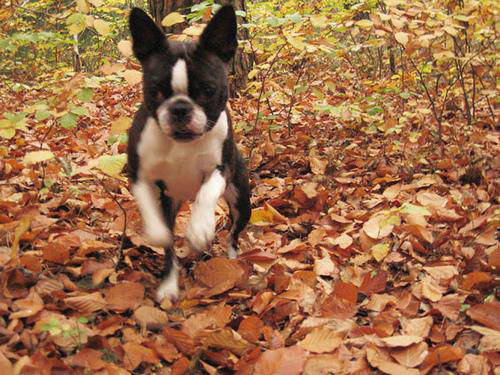

In [ ]:
img = PIL.Image.open('train/000bec180eb18c7604dcecc8fe0dba07.jpg')
img

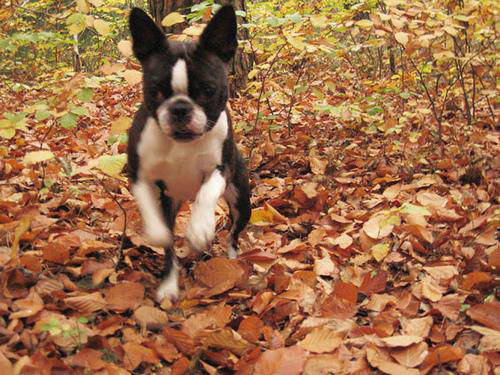

In [ ]:
tf.keras.preprocessing.image.load_img('train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
a = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img('train/000bec180eb18c7604dcecc8fe0dba07.jpg'))

In [ ]:
preprocessing_function=tf.keras.applications.vgg16.preprocess_input(a)

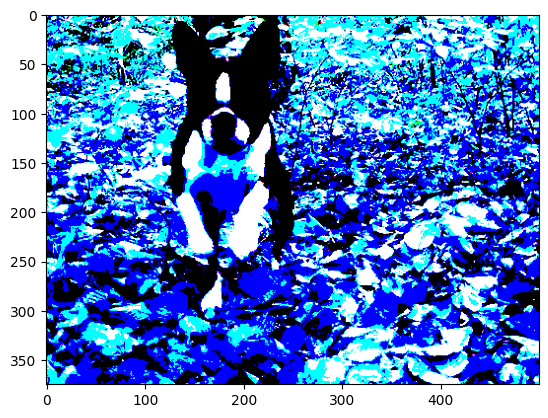

In [ ]:
plt.imshow(preprocessing_function)

In [ ]:
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_arr = np.expand_dims(img_arr,axis=0)

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 40,
                                                      width_shift_range=0.2,height_shift_range=0.2,
                                                      zoom_range=(0.9,1), brightness_range=(.50,1.5),
                                                      fill_mode='nearest',horizontal_flip=True,
                                                      preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                                      validation_split=0.1)

In [ ]:
batch_size = 16

In [ ]:
train_idg = idg.flow_from_dataframe(dataframe = df,directory= 'train/', x_col = 'id' , y_col = 'breed',
                                    target_size = (350,350), batch_size = batch_size,
                                    subset = 'training')

Found 9200 validated image filenames belonging to 120 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(dataframe = df,directory= 'train/', x_col = 'id' , y_col = 'breed',
                                    target_size = (350,350), batch_size = batch_size,
                                    subset = 'validation')

Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape= (350,350,3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0     

In [ ]:
vgg.trainable=False

In [ ]:
flat = tf.keras.layers.Flatten(name = 'Flat') (vgg.output)
dense1 = tf.keras.layers.Dense(4126, activation  = 'relu', name = 'Hidden1') (flat)
dense2 = tf.keras.layers.Dense(1024, activation = 'relu', name = 'Hidden2') (dense1)
# dense3 = tf.keras.layers.Dense(512, activation = 'relu', name = 'Hidden3') (dense2)
output = tf.keras.layers.Dense(120, activation = 'softmax', name = 'Output') (dense2)

In [ ]:
model = tf.keras.models.Model(inputs = vgg.input, outputs = output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0     

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.003),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [ ]:
model.fit(train_idg, batch_size=batch_size, epochs=10, validation_data=val_idg)

Epoch 1/10
575/575 [==============================] - 409s 687ms/step - loss: 5.6630 - acc: 0.1289 - val_loss: 2.7933 - val_acc: 0.2916
Epoch 2/10
 92/575 [===>..........................] - ETA: 5:03 - loss: 2.6875 - acc: 0.3166